In [2]:
import os
import pandas as pd
import numpy
import matplotlib.pyplot as plt



In [3]:
csv_path = "Resource/Electric_Vehicle_Population_Data.csv"

In [4]:
car_df = pd.read_csv(csv_path)

In [5]:
WA_df = car_df.loc[(car_df["State"] == "WA")]


In [6]:
WA_2011_df = WA_df.loc[(WA_df["Model Year"] > 2010)]

In [7]:
WA_2011_df = WA_2011_df.drop(columns=['Electric Utility', "Base MSRP"])

In [8]:
close_df = WA_2011_df

In [9]:
close_df['Vehicle Location'] = close_df['Vehicle Location'].astype('str').str.replace('POINT', '')


In [10]:
close_df["Postal Code"] = close_df["Postal Code"].astype(int)
close_df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Legislative District,DOL Vehicle ID,Vehicle Location,2020 Census Tract
1,5YJXCBE27J,Island,Greenbank,WA,98253,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,10.0,326880081,(-122.575569 48.08489),5.302997e+10
8,1N4BZ0CP8H,Chelan,Wenatchee,WA,98801,2017,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,107,12.0,192768747,(-120.336499 47.425146),5.300796e+10
10,WVWKR7AU3K,Snohomish,Edmonds,WA,98026,2019,VOLKSWAGEN,E-GOLF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,125,32.0,477565112,(-122.333046 47.829439),5.306105e+10
11,5YJ3E1EB0J,Island,Clinton,WA,98236,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,10.0,476402678,(-122.35803 47.9796),5.302997e+10
13,5YJ3E1EBXL,Snohomish,Brier,WA,98036,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,1.0,103288153,(-122.281856 47.811678),5.306105e+10


Stacked Bar - Top 3 most popular by county

In [18]:
county_brand_df = close_df[["County", "Make"]]
df = county_brand_df.groupby("County").value_counts()
df

pandas.core.series.Series

In [57]:
Tesla = county_brand_df.loc[county_brand_df["Make"] == "TESLA"]
#clean_Tesla = Tesla.loc[(Tesla["County"]!= "Ferry") & (Tesla["County"]!= "Garfield")]
#clean_Tesla
Tesla_count = Tesla.groupby(Tesla["County"]).count()
Tesla_count.index

Index(['Adams', 'Asotin', 'Benton', 'Chelan', 'Clallam', 'Clark', 'Columbia',
       'Cowlitz', 'Douglas', 'Ferry', 'Franklin', 'Garfield', 'Grant',
       'Grays Harbor', 'Island', 'Jefferson', 'King', 'Kitsap', 'Kittitas',
       'Klickitat', 'Lewis', 'Lincoln', 'Mason', 'Okanogan', 'Pacific',
       'Pend Oreille', 'Pierce', 'San Juan', 'Skagit', 'Skamania', 'Snohomish',
       'Spokane', 'Stevens', 'Thurston', 'Wahkiakum', 'Walla Walla', 'Whatcom',
       'Whitman', 'Yakima'],
      dtype='object', name='County')

In [68]:
Tesla = county_brand_df.loc[county_brand_df["Make"] == "TESLA"]
clean_Tesla = Tesla.loc[(Tesla["County"]!= "Ferry") & (Tesla["County"]!= "Garfield")]
clean_Tesla
Tesla_count = clean_Tesla.groupby(clean_Tesla["County"]).count()
Tesla_count.shape

(37, 1)

In [69]:
Ford = county_brand_df.loc[county_brand_df["Make"] == "FORD"]
clean_Ford = Ford.loc[Ford["County"]!= "Garfield"]
Ford_count = clean_Ford.groupby(clean_Ford["County"]).count()
Ford_count.shape

(37, 1)

In [71]:
Chevrolet = county_brand_df.loc[county_brand_df["Make"] == "CHEVROLET"]
clean_Che = Chevrolet.loc[Chevrolet["County"]!= "Ferry"]
Chevrolet_count = clean_Che.groupby(clean_Che["County"]).count()
Chevrolet_count.shape

(37, 1)

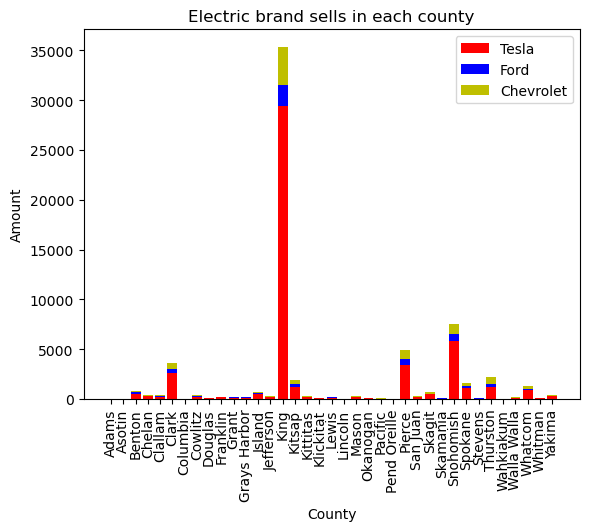

In [76]:
County = Tesla_count.index
Tesla_number = Tesla_count["Make"]
Ford_number = Ford_count["Make"]
Chevrolet_number = Chevrolet_count["Make"]



 
# plot bars in stack manner
plt.bar(County, Tesla_number, color='r')
plt.bar(County, Ford_number, bottom=Tesla_number, color='b')
plt.bar(County, Chevrolet_number, bottom=Tesla_number+Ford_number, color='y')
#plt.bar(x, y4, bottom=y1+y2+y3, color='g')
plt.xticks(rotation=90)
plt.xlabel("County")
plt.ylabel("Amount")
plt.legend(["Tesla", "Ford", "Chevrolet"])
plt.title("Electric brand sells in each county")
plt.show()

In [19]:
# Extract the County and Make (Brand) data
Ford = df.loc[["Make"] == "FORD"]
Tesla= []
Chevrolet = []
Nissan = []
Ford


#county_brand_df = close_df[["County", "Make"]]
#df= county_brand_df.groupby(county_brand_df["County"]).value_counts()

#df.plot(x='County', kind='bar', stacked=True,
        #title='Stacked Bar Graph by dataframe',figsize=(100,8))
#plt.show()

KeyError: 'False: boolean label can not be used without a boolean index'